<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab7_Local_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: **Local Histogram Equalization - Tiling approach**

Input Histogram


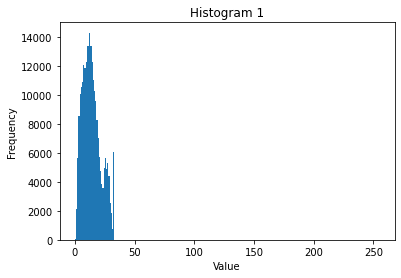

Output Histogram


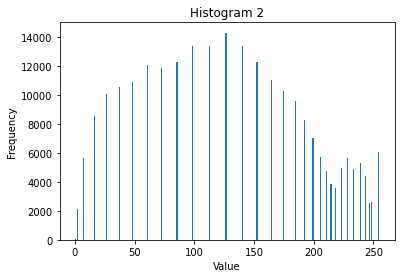

In [ ]:
#necessary imports
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 

#function to equalize an image and return the resulting array
def equalize(image):
  #create a copy of the input image, to avoid modifying the original image
  img = image.copy()
  #input dimensions of the image
  row, col = img.shape[:2]
  #create an array of size 256 initialized with 0
  array = np.zeros(256)
  
  #create a histogram manually in the array
  for i in range(row):
    for j in range(col):
        array[img[i,j]] += 1
  
  #vectorized operation to obtain pdf by dividing with total pixels
  array /= (row * col)
  
  #obtain cdf by adding subsequent pdf values
  for y in range(1,len(array)):#starts from 1 as negative access causes error and first cdf values is same as first pdf value
    array[y] += array[y-1] 
  
  #vectorized operation to obtain equalized intensity values by multiplying with 255 as an integer
  array = (array * 255).astype('uint8')
  
  #map the equalized intensity values to input image arrat
  for i in range(row):
    for j in range(col):
        img[i,j] = array[img[i,j]]  
  
  #return equalized image
  return img

 
#load the image
input = cv2.imread('lab07_img.png',0) 

#retun equalized image to output
output = equalize(input.copy())


inp = Image.fromarray(input) #store input image as inp
out = Image.fromarray(output) #store output image as out
cv2.imwrite('output.png', output) #save output image 


 
print("Input Histogram")
#label the histogram
plt.title("Histogram 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the histogram
plt.hist(input.ravel(), bins = 255, range=(0,255))
#display histogram
plt.show()


print("Output Histogram")
#label the second histogram
plt.title("Histogram 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the second histogram
plt.hist(output.ravel(), bins = 255, range=(0,255))
#display second histogram
plt.show() 


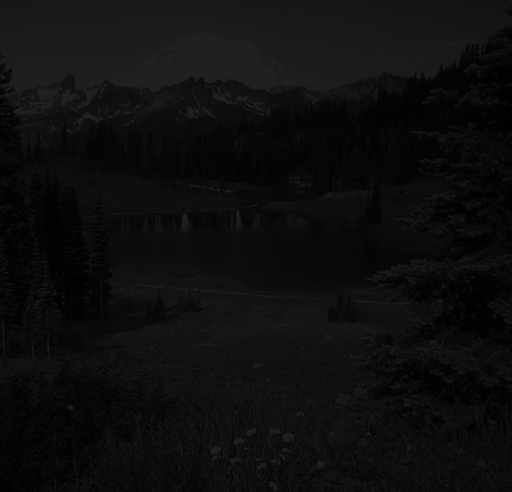

In [ ]:
inp

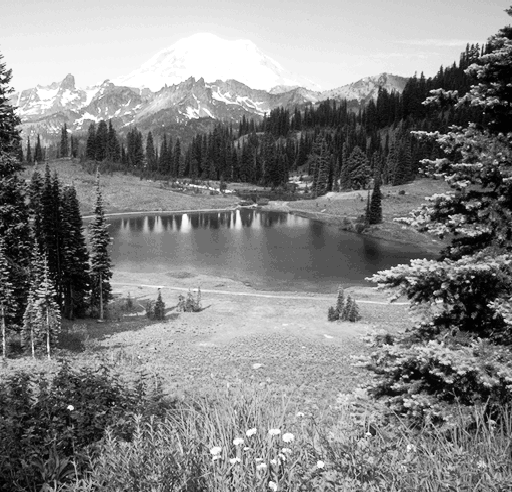

In [ ]:
out

## Task 2: **Local Histogram Equalization - Sliding Window approach**

Input Histogram


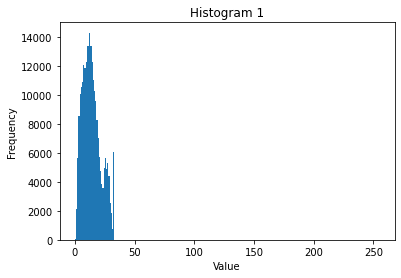

Output Histogram


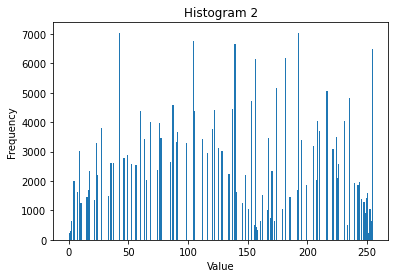

In [ ]:
#necessary imports
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

#create a copy of the original image
t_img = input.copy()

#input dimensions of the image
row, col = t_img.shape[:2]

#find the middle row and middle column of image by halving
mid_row = row//2
mid_col = col//2

#create four equal tiles by slicing the numpy array of image
tile1 = t_img[:mid_row,:mid_col]
tile2 = t_img[:mid_row,mid_col:]
tile3 = t_img[mid_row:,:mid_col]
tile4 = t_img[mid_row:,mid_col:]

#output the equalized tiles to hteir respective positions
t_img[:mid_row, :mid_col] = equalize(tile1)
t_img[:mid_row, mid_col:] = equalize(tile2)
t_img[mid_row:,:mid_col] = equalize(tile3)
t_img[mid_row:, mid_col:] = equalize(tile4)

#store output image iin img2 to be displayed
img2 = Image.fromarray(t_img)

print("Input Histogram")
#label the histogram
plt.title("Histogram 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the histogram
plt.hist(input.ravel(), bins = 255, range=(0,255))
#display histogram
plt.show()

print("Output Histogram")
#label the second histogram
plt.title("Histogram 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the second histogram
plt.hist(t_img.ravel(), bins = 255, range=(0,255))
#display second histogram
plt.show() 



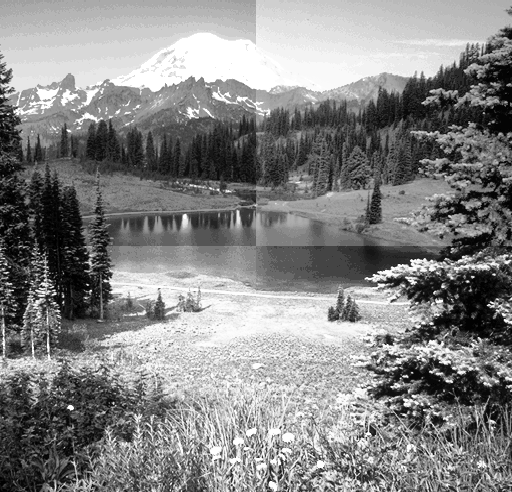

In [ ]:
img2

  0%|          | 0/460 [00:00<?, ?it/s]

Input Histogram


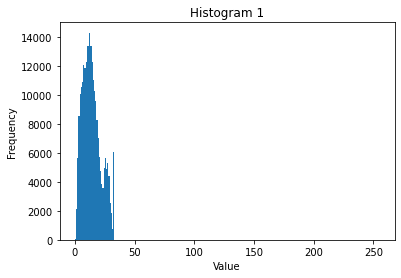

Output Histogram


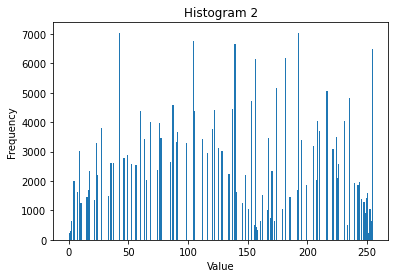

In [ ]:
#necessary imports
import numpy as np
import cv2
from tqdm.notebook import tqdm

#create a copy of the original image
img_mod = input.copy()

#double for loop to access each 32x32 pixel sized windows for equalization
for i in tqdm(range(0,row-32)): #tqdm dispplays current progress
    for j in range(0,col-32):
        img_mod[i:i+32,j:j+32] = equalize(input[i:i+32,j:j+32])        

#store putput image to img3 to be displayed
img3 = Image.fromarray(img_mod)

print("Input Histogram")
#label the histogram
plt.title("Histogram 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the histogram
plt.hist(input.ravel(), bins = 255, range=(0,255))
#display histogram
plt.show()

print("Output Histogram")
#label the second histogram
plt.title("Histogram 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the second histogram
plt.hist(t_img.ravel(), bins = 255, range=(0,255))
#display second histogram
plt.show() 



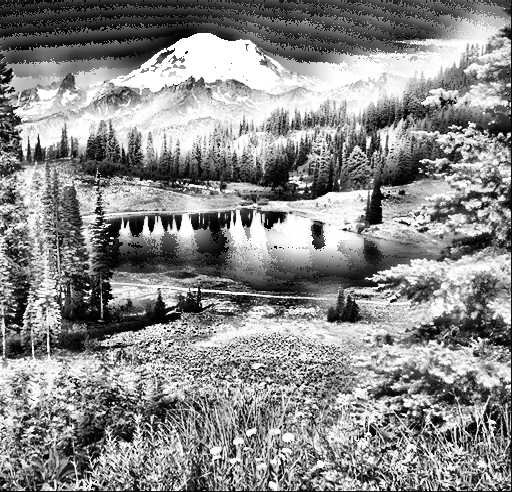

In [ ]:
img3